In [1]:
import json
import pandas as pd
import h5py
import numpy as np
import tensorflow as tf
import keras
from keras.layers import Input, Dense, Dropout, LSTM, Flatten, GRU,TimeDistributed, Conv1D
from keras.models import Model, Sequential
from keras.optimizers import Adam, SGD
from sklearn.model_selection import train_test_split
import os
import h5py
import matplotlib.pyplot as plt
from keras import regularizers
from tensorflow.keras.regularizers import l1
import ast
from tqdm import tqdm

In [ ]:
df = pd.read_json('dataset1g.json', lines=True
                 )

In [2]:
df = pd.read_hdf('data_500k_with_tv')

In [3]:
length = len(df)
featuresnum = 16

In [4]:
df

,jet_pt,jet_eta,track_2_d0_significance,track_3_d0_significance,track_2_z0_significance,track_3_z0_significance,n_tracks_over_d0_threshold,jet_prob,jet_width_eta,jet_width_phi,vertex_significance,n_secondary_vertices,n_secondary_vertex_tracks,delta_r_vertex,vertex_mass,vertex_energy_fraction,Light_Jet,Charm_Jet,Bottom_Jet,17
0,32.2340,-0.643775,10.700800,3.150200,0.954538,2.443190,3.0,4.913230e-06,0.067985,0.048788,84.13960,1.0,3.0,0.060169,1.687200,0.999864,0,0,1,"[{{-0.215808, -0.116363, -0.00300674, 0.01526..."
1,27.1675,-1.765690,34.596800,30.913200,0.163268,27.323300,3.0,2.576370e-16,0.078479,0.105953,232.56700,1.0,2.0,0.100039,0.302106,0.097107,0,0,1,"[{{0.865832, -0.0154666, -0.0470188, 0.004403..."
2,76.5242,-0.865873,2.304720,4.925830,3.178780,2.789300,3.0,8.453530e-06,0.050667,0.073102,64.10110,1.0,3.0,0.041544,1.089930,0.646448,0,0,1,"[{{-0.0305462, 0.276271, 0.0221988, -0.021539..."
3,65.7796,-0.596838,6.958120,2.081550,2.777960,0.413344,3.0,5.666940e-08,0.119558,0.086531,30.68700,1.0,2.0,0.074565,0.806820,0.290825,0,0,1,"[{{-0.0536946, -0.0232979, -0.172776, -0.1518..."
4,24.2995,0.184280,14.144600,4.954620,0.668378,0.117590,4.0,1.145500e-09,0.135787,0.086738,141.32700,2.0,8.0,0.045288,2.312110,1.714390,0,0,1,"[{{-0.238139, -0.498327, -0.0209764, -0.16195..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458715,38.2624,1.076520,4.280160,0.837287,1.030040,1.354330,2.0,3.595560e-04,0.096017,0.102977,5.67967,1.0,2.0,0.021131,1.881380,0.754975,0,1,0,"[{{-0.00085676, -0.00729374, -0.126886, -0.04..."
458716,26.9991,-1.842880,0.873438,0.951756,1.867080,0.165320,0.0,9.324860e-03,0.139642,0.188941,26.00780,1.0,2.0,4.624330,0.797176,0.463599,0,1,0,"[{{-0.0360209, -0.0608207, 0.0194916, -0.0191..."
458717,27.5957,-0.618959,2.081820,0.852374,1.934650,2.691350,2.0,5.753440e-04,0.072008,0.071996,27.30100,1.0,3.0,0.107310,1.161160,0.941296,0,1,0,"[{{0.0252132, 0.0875218, -0.176529, -0.070535..."
458718,26.2631,-0.230878,0.906961,0.506578,0.917184,2.258050,1.0,4.674780e-03,0.100409,0.050210,15.02400,1.0,2.0,0.108452,0.601236,0.642732,0,1,0,"[{{-0.044976, -0.432072, -0.0443296, -0.01766..."


In [4]:
x= df.values

In [5]:
features = np.zeros([length,15,7])
features.shape

(458720, 15, 7)

In [6]:
features = x[:,0:16]

In [33]:
features[0]

array([2.84141e+01, 2.27459e+00, 1.02997e+01, 1.02035e+01, 1.24896e+01,
       1.54875e+01, 5.00000e+00, 5.62798e-13, 1.48365e-01, 1.34626e-01,
       7.27073e+01, 1.00000e+00, 3.00000e+00, 5.40790e-02, 5.58893e-01,
       7.15804e-01])

In [ ]:
x[:,19][4]

In [7]:
num = 0
exceptions = 0
for z in tqdm(x):
    try:
        k = z[19]
        k = k.replace(' ', '')
        k = k.replace('{','[')
        k = k.replace('}',']')
        k = k.replace('nan', '0')
        k = k.replace('inf', '0')
        k = k.replace('-inf', '0')
        k = k.replace('-1','0')
        k = np.array(ast.literal_eval(k))
        num1 = 0
        for p in k:
            num4 = 0
            for g in np.array(p[3]):
                features[num][num1][num4] = g
                num4 = num4 + 1
            num1 = num1 + 1
    except:
        exceptions = exceptions + 1
        pass
    num = num + 1

  0%|          | 0/458720 [00:00<?, ?it/s]/home/anrunw/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  del sys.path[0]
100%|██████████| 458720/458720 [03:40<00:00, 2083.22it/s]


In [ ]:
exceptions

array([[32.234, -0.643775, 10.7008, ..., 0.0601691, 1.6872, 0.999864],
       [27.1675, -1.76569, 34.5968, ..., 0.100039, 0.302106, 0.097107],
       [76.5242, -0.865873, 2.30472, ..., 0.041544, 1.08993, 0.646448],
       ...,
       [27.5957, -0.618959, 2.08182, ..., 0.10731, 1.16116, 0.941296],
       [26.2631, -0.230878, 0.906961, ..., 0.108452, 0.601236, 0.642732],
       [39.072, 1.61159, 2.15423, ..., 0.0886626, 0.357871, 0.327596]],
      dtype=object)

In [7]:
labels = x[:,16:19]

In [8]:
labels

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0]], dtype=object)

In [9]:
lab = np.zeros((length,1))

In [10]:
x[:,16]

array([0, 0, 0, ..., 0, 0, 0], dtype=object)

In [11]:
x[:,16:19]

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0]], dtype=object)

In [12]:
labels

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0]], dtype=object)

In [13]:
num = 0
for g in labels:
    if g[2] == 1:
        lab[num][0] = 1
    num = num + 1

In [14]:
lab

array([[1.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]])

In [ ]:
feature = df.values[:,0:16]

In [ ]:
lab.shape

In [ ]:
len(features)

In [ ]:
labels = df.values[:,16:19]

In [ ]:
labels

In [ ]:
df.columns = ['j_pt', 'j_eta', 'flavor', 'high_level_track','high_level_vertex','track_variables']

In [ ]:
df

In [ ]:
length = len(df)
featuresnum = 16

In [ ]:
features = np.zeros([length,featuresnum])

In [ ]:
z = df.values

In [ ]:
z[:,0].shape

In [ ]:
labmatrix = np.zeros([length,1])

Makes a label matrix

In [ ]:
num = 0
for e in z:
    labmatrix[num] = e[2]
    num = num+1

In [ ]:
labmatrix

one-hot encodes labels

In [ ]:
lab = np.zeros([length,3])
num = 0
for x in labmatrix:
    if x == 0:
        lab[num][0]= 1
    elif x == 4:
        lab[num][1] = 1
    else:
        lab[num][2] = 1
    num = num + 1

In [ ]:
lab

Appends all Pt values into matrix

In [ ]:
num = 0
for e in z:
    features[num][0] = e[0]
    num = num+1

In [ ]:
features

Appends eta values into matrix

In [ ]:
num = 0 
for e in z:
    features[num][1] = e[1]
    num = num+1

In [ ]:
features

Appends all high level tracking variables

In [ ]:
num = 0

for e in z:
    num2 = 2
    for var in e[3]:
        features[num][num2] = var
        num2 = num2+1
    num = num+1

In [ ]:
features[2]

Appends all high level vertex variables

In [ ]:
num = 0

for e in z:
    num2 = 10
    for var in e[4]:
        features[num][num2] = var
        num2 = num2+1
    num = num+1

In [ ]:
len(features)

normalizes matrix with SD of 1


In [15]:
normfeatures = np.zeros([length,15,7])

In [16]:
normfeatures.shape

(458720, 15, 7)

In [17]:
transpose = features.transpose()

In [ ]:
features

In [18]:
num = 0
for column in transpose:
    g = (column - np.mean(column))/np.std(column)
    num2 = 0
    for e in g:
        normfeatures[num2,num] = e
        num2 = num2+1
    num = num+1
        

ValueError: could not broadcast input array from shape (458720) into shape (7)

In [ ]:
normfeatures = np.nan_to_num(normfeatures,copy=True)

In [ ]:
normfeatures.shape

In [42]:
X_train, X_test, y_train, y_test = train_test_split(features,lab, test_size = 0.2, random_state = 42)


In [26]:
X_train

array([[25.6116, -1.95917, 20.8794, ..., 0.160423, 1.98638, 1.14442],
       [30.2809, 0.311277, 0.92203, ..., 0.461915, 1.45516, 0.607637],
       [34.4223, 0.25858, 4.59314, ..., 0.074726, 0.93278, 0.569288],
       ...,
       [37.4974, -0.0649543, 14.5853, ..., 0.0283417, 2.23829, 0.841346],
       [30.6886, -0.0227608, 3.38495, ..., 0.0560654, 2.06787, 0.567753],
       [23.8499, -1.39011, 8.21154, ..., 0.187989, 1.32974, 0.322062]],
      dtype=object)

In [59]:
Inputs = Input(shape=16)
x = Dense(256, activation='relu', kernel_initializer='lecun_uniform', name='fc1_relu')(Inputs)
x= Dropout(rate = 0.5)(x)
x = Dense(128, activation='relu', kernel_initializer='lecun_uniform', name = 'fc2')(x)
x= Dropout(rate = 0.5)(x)
x = Dense(64, activation='relu', kernel_initializer='lecun_uniform', name = 'fc3')(x)
x= Dropout(rate = 0.5)(x)
x = Dense(32, activation='relu', kernel_initializer='lecun_uniform', name='fc4')(x)
x= Dropout(rate = 0.5)(x)
x = Dense(16, activation='relu', kernel_initializer='lecun_uniform', name='fc7')(x)
predictions = Dense(1, activation='sigmoid', kernel_initializer='lecun_uniform', name = 'output_sigmoid')(x)
model = Model(inputs=Inputs, outputs=predictions)
model.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 16)]              0         
_________________________________________________________________
fc1_relu (Dense)             (None, 256)               4352      
_________________________________________________________________
dropout_34 (Dropout)         (None, 256)               0         
_________________________________________________________________
fc2 (Dense)                  (None, 128)               32896     
_________________________________________________________________
dropout_35 (Dropout)         (None, 128)               0         
_________________________________________________________________
fc3 (Dense)                  (None, 64)                8256      
_________________________________________________________________
dropout_36 (Dropout)         (None, 64)                0   

In [60]:
adam = Adam(lr=0.002)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

In [72]:
history = model.fit(X_train, y_train, batch_size = 1024, epochs = 10, 
                    validation_split = 0.25, shuffle = True, callbacks = None,
                    use_multiprocessing=True, workers=4)

Epoch 1/10
833/833 [==============================] - 49s 59ms/step - loss: 0.3932 - accuracy: 0.8263 - val_loss: 0.3918 - val_accuracy: 0.8319
Epoch 2/10
833/833 [==============================] - 65s 79ms/step - loss: 0.3923 - accuracy: 0.8266 - val_loss: 0.3994 - val_accuracy: 0.8263
Epoch 3/10
833/833 [==============================] - 83s 99ms/step - loss: 0.3920 - accuracy: 0.8271 - val_loss: 0.4031 - val_accuracy: 0.8253
Epoch 4/10
833/833 [==============================] - 46s 56ms/step - loss: 0.3911 - accuracy: 0.8276 - val_loss: 0.3878 - val_accuracy: 0.8302
Epoch 5/10
833/833 [==============================] - 37s 44ms/step - loss: 0.3902 - accuracy: 0.8276 - val_loss: 0.3939 - val_accuracy: 0.8307
Epoch 6/10
833/833 [==============================] - 46s 56ms/step - loss: 0.3903 - accuracy: 0.8280 - val_loss: 0.3947 - val_accuracy: 0.8294
Epoch 7/10
 56/833 [=>............................] - ETA: 35s - loss: 0.3878 - accuracy: 0.8297

KeyboardInterrupt: 

In [21]:
def learningCurve(history):
    plt.figure(figsize=(10,8))
    plt.plot(history.history['loss'], linewidth=1)
    plt.plot(history.history['val_loss'], linewidth=1)
    plt.title('Model Loss over Epochs')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['training sample loss','validation sample loss'])
    #plt.savefig('Learning_curve.pdf')
    plt.show()
    plt.close()

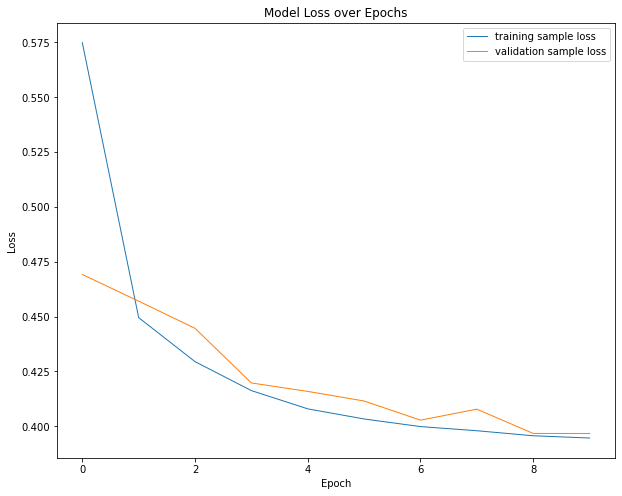

In [63]:
learningCurve(history)

In [65]:
labels = ['light/charm/bottom']


In [70]:
model.save('dnnVertex2class.h5')

In [73]:
labels_pred = model.predict(X_test)

In [ ]:
labels_pred

In [ ]:
len(features)

In [ ]:
len(X_test)

In [ ]:
y_test = df.values[:,16:19]

In [ ]:
len(y_test)

In [74]:
def makeRoc(features_val, labels_val, labels, model, outputDir='', outputSuffix=''):
    from sklearn.metrics import roc_curve, auc
    df = pd.DataFrame()
    fpr = {}
    tpr = {}
    auc1 = {}
    plt.figure(figsize=(16,8))       
    for i, label in enumerate(labels):
        df[label] = labels_val[:,i]
        df[label + '_pred'] = labels_pred[:,i]
        fpr[label], tpr[label], threshold = roc_curve(df[label],df[label+'_pred'])
        auc1[label] = auc(fpr[label], tpr[label])
        plt.plot(fpr[label],tpr[label],label='%s tagger, AUC = %.1f%%'%(label.replace('j_',''),auc1[label]*100.))
    plt.plot([0, 1], [0, 1], lw=1, color='black', linestyle='--')
    #plt.semilogy()
    plt.xlabel("Background Efficiency")
    plt.ylabel("Signal Efficiency")
    plt.xlim([-0.05, 1.05])
    plt.ylim(0.001,1.05)
    plt.grid(True)
    plt.legend(loc='lower right')
    plt.figtext(0.25, 0.90,'Feed Forward Roc Curve',fontweight='bold', wrap=True, horizontalalignment='right', fontsize=14)
    #plt.figtext(0.35, 0.90,'preliminary', style='italic', wrap=True, horizontalalignment='center', fontsize=14) 
    #plt.savefig('%sROC_%s.pdf'%(outputDir, outputSuffix))
    return labels_pred

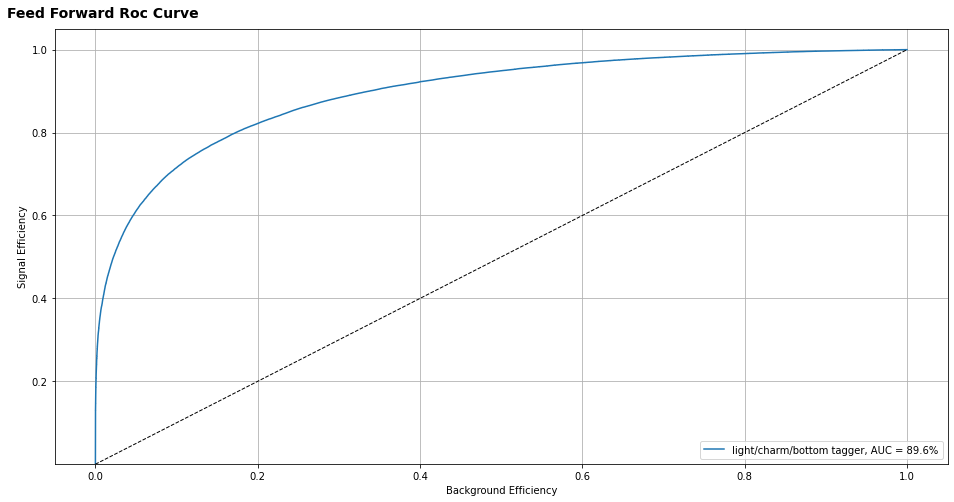

In [75]:
y_pred = makeRoc(X_test, y_test, labels, model, outputSuffix='two-layer')

In [ ]:
y_pred = makeRoc(X_test, y_test, labels, model, outputSuffix='two-layer')

In [ ]:
y_test

In [16]:
X_train, X_test, y_train, y_test = train_test_split(features,lab,test_size = 0.2, random_state = 42)


In [17]:
imagetrain = X_train.reshape(len(X_train), 16, 1)

In [89]:
Inputs = Input(shape=(16,1))
x = LSTM(16, kernel_initializer = 'VarianceScaling', kernel_regularizer = regularizers.l1_l2(l1= 9.999E-5, l2 = 0.0), name = 'lstm1')(Inputs)
x = Flatten(trainable= True)(x)
predictions = Dense(1, activation='sigmoid', kernel_initializer='lecun_uniform', name = 'output_sigmoid')(x)
model = Model(inputs=Inputs, outputs=predictions)
model.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 16, 1)]           0         
_________________________________________________________________
lstm1 (LSTM)                 (None, 16)                1152      
_________________________________________________________________
flatten_3 (Flatten)          (None, 16)                0         
_________________________________________________________________
output_sigmoid (Dense)       (None, 1)                 17        
Total params: 1,169
Trainable params: 1,169
Non-trainable params: 0
_________________________________________________________________


In [90]:

adam = Adam(lr = 0.0001)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [91]:
history = model.fit(X_train, y_train, batch_size = 1024, epochs = 10, 
                    validation_split = 0.25, shuffle = True, callbacks = None,
                    use_multiprocessing=True, workers=4)

Epoch 1/10
833/833 [==============================] - 45s 54ms/step - loss: 0.4534 - accuracy: 0.7936 - val_loss: 0.4170 - val_accuracy: 0.8152
Epoch 2/10
833/833 [==============================] - 46s 55ms/step - loss: 0.4059 - accuracy: 0.8182 - val_loss: 0.3994 - val_accuracy: 0.8216
Epoch 3/10
833/833 [==============================] - 44s 53ms/step - loss: 0.3970 - accuracy: 0.8228 - val_loss: 0.3927 - val_accuracy: 0.8263
Epoch 4/10
833/833 [==============================] - 59s 71ms/step - loss: 0.3914 - accuracy: 0.8270 - val_loss: 0.3877 - val_accuracy: 0.8296
Epoch 5/10
833/833 [==============================] - 46s 55ms/step - loss: 0.3872 - accuracy: 0.8295 - val_loss: 0.3863 - val_accuracy: 0.8311
Epoch 6/10
833/833 [==============================] - 53s 64ms/step - loss: 0.3847 - accuracy: 0.8310 - val_loss: 0.3860 - val_accuracy: 0.8309
Epoch 7/10
833/833 [==============================] - 52s 63ms/step - loss: 0.3829 - accuracy: 0.8318 - val_loss: 0.3808 - val_accuracy:

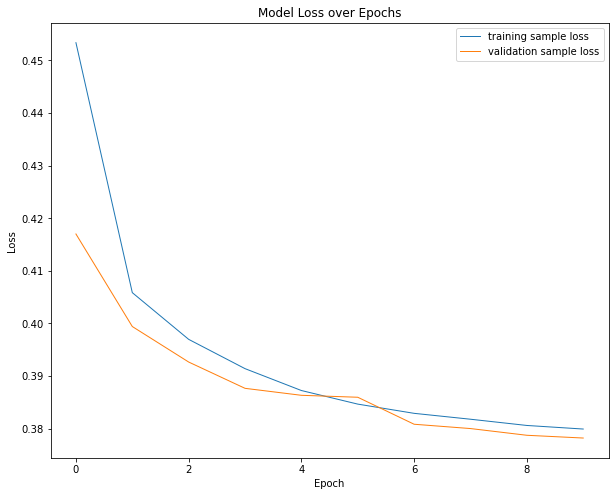

In [92]:
learningCurve(history)

In [33]:
imagetest = X_test.reshape(len(X_test), 16, 1)

In [19]:
labels = ['light/charm/bottom']


In [ ]:
lab

In [20]:
def makeRoc(features_val, labels_val, labels, model, outputDir='', outputSuffix=''):
    from sklearn.metrics import roc_curve, auc
    labels_pred = model.predict(features_val)
    df = pd.DataFrame()
    fpr = {}
    tpr = {}
    auc1 = {}
    plt.figure(figsize=(10,8))       
    for i, label in enumerate(labels):
        df[label] = labels_val[:,i]
        df[label + '_pred'] = labels_pred[:,i]
        fpr[label], tpr[label], threshold = roc_curve(df[label],df[label+'_pred'])
        auc1[label] = auc(fpr[label], tpr[label])
        plt.plot(fpr[label],tpr[label],label='%s tagger, AUC = %.1f%%'%(label.replace('j_',''),auc1[label]*100.))
    plt.plot([0, 1], [0, 1], lw=1, color='black', linestyle='--')
    #plt.semilogy()
    plt.xlabel("Background Efficiency")
    plt.ylabel("Signal Efficiency")
    plt.xlim([-0.05, 1.05])
    plt.ylim(0.001,1.05)
    plt.grid(True)
    plt.legend(loc='lower right')
    plt.figtext(0.25, 0.90,'LSTM ROC Curve',fontweight='bold', wrap=True, horizontalalignment='right', fontsize=14)
    #plt.figtext(0.35, 0.90,'preliminary', style='italic', wrap=True, horizontalalignment='center', fontsize=14) 
    #plt.savefig('%sROC_%s.pdf'%(outputDir, outputSuffix))
    return labels_pred

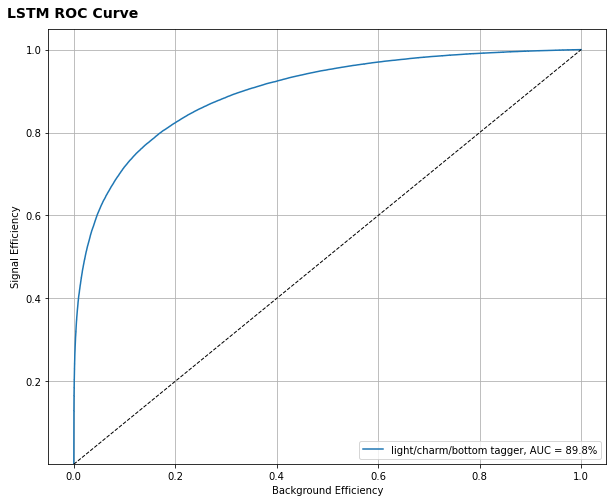

In [96]:
y_pred = makeRoc(X_test, y_test, labels, model, outputSuffix='two-layer')

In [ ]:
model.save('lstmvertex.h5')

In [ ]:
model.save_weights('lstm_weights')

In [ ]:
model = tf.keras.models.load_model('lstm.h5')


In [27]:

l1Reg =  0.0001
l1RegR = 0.001

Inputs = Input(shape = (16,1))

x = GRU(16,kernel_regularizer=l1(l1Reg),recurrent_regularizer=l1(l1RegR),activation='relu', recurrent_activation='sigmoid', name='gru_selu',)(Inputs)
x = Dense(20,kernel_regularizer=l1(l1Reg),activation='relu', kernel_initializer='lecun_uniform', name='dense_relu')(x)
x = Dropout(0.1)(x)
predictions = Dense(1, activation='sigmoid', kernel_initializer='lecun_uniform', name='rnn_densef')(x)
model = Model(inputs=Inputs, outputs=predictions)

model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 16, 1)]           0         
_________________________________________________________________
gru_selu (GRU)               (None, 16)                912       
_________________________________________________________________
dense_relu (Dense)           (None, 20)                340       
_________________________________________________________________
dropout_2 (Dropout)          (None, 20)                0         
_________________________________________________________________
rnn_densef (Dense)           (None, 1)                 21        
Total params: 1,273
Trainable params: 1,273
Non-trainable params: 0
_________________________________________________________________


In [28]:
adam = Adam(lr = 0.002)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
history = model.fit(X_train.astype(float), y_train.astype(float), batch_size = 1024, epochs = 15, 
                    validation_split = 0.25, shuffle = True, callbacks = None,
                    use_multiprocessing=True, workers=4)

Epoch 1/15
269/269 [==============================] - 28s 105ms/step - loss: 1.1039 - accuracy: 0.6899 - val_loss: 0.5315 - val_accuracy: 0.7804
Epoch 2/15
269/269 [==============================] - 29s 109ms/step - loss: 0.5009 - accuracy: 0.8028 - val_loss: 0.4239 - val_accuracy: 0.8318
Epoch 3/15
269/269 [==============================] - 30s 110ms/step - loss: 0.4280 - accuracy: 0.8301 - val_loss: 0.4117 - val_accuracy: 0.8369
Epoch 4/15
269/269 [==============================] - 38s 140ms/step - loss: 0.4172 - accuracy: 0.8344 - val_loss: 0.4045 - val_accuracy: 0.8375
Epoch 5/15
269/269 [==============================] - 22s 81ms/step - loss: 0.4105 - accuracy: 0.8365 - val_loss: 0.4006 - val_accuracy: 0.8395
Epoch 6/15
269/269 [==============================] - 28s 103ms/step - loss: 0.4054 - accuracy: 0.8380 - val_loss: 0.3954 - val_accuracy: 0.8417
Epoch 7/15
269/269 [==============================] - 26s 97ms/step - loss: 0.4034 - accuracy: 0.8392 - val_loss: 0.3925 - val_accu

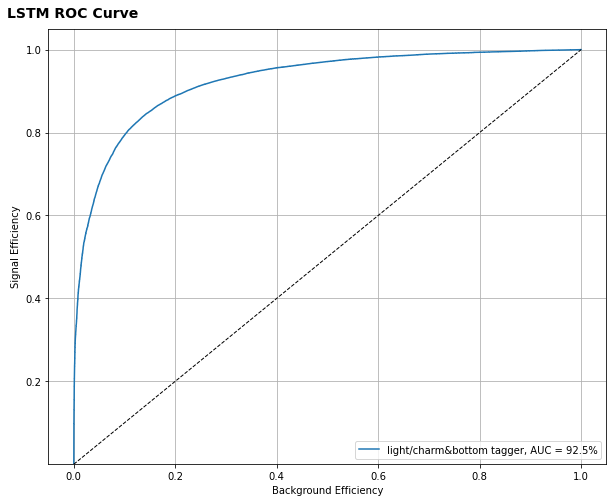

In [35]:
y_pred = makeRoc(X_test.astype(float), y_test.astype(float), labels, model, outputSuffix='two-layer')

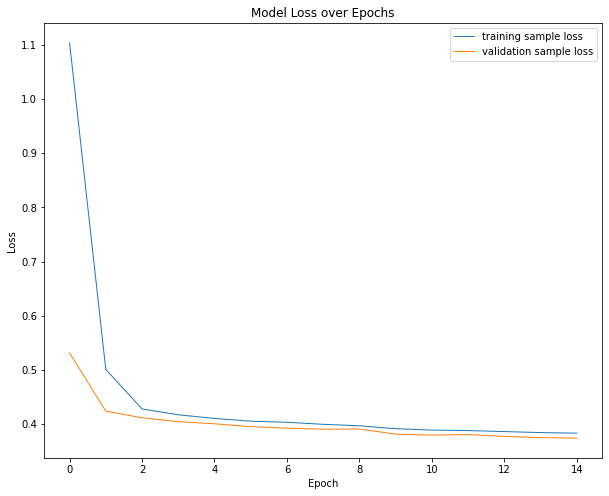

In [36]:
learningCurve(history)

In [ ]:
model.save('GRUVertex.h5')

In [126]:
Inputs = Input(shape=(15,7))
x = LSTM(15, kernel_initializer = 'VarianceScaling', kernel_regularizer = regularizers.l1_l2(l1= 9.999E-5, l2 = 0.0), name = 'lstm1')(Inputs)
x = Dense(64, activation='relu', kernel_initializer='lecun_uniform', name='fc4')(x)
x= Dropout(rate = 0.3)(x)
x = Dense(32, activation='relu', kernel_initializer='lecun_uniform', name='fc7')(x)
x= Dropout(rate = 0.3)(x)
x = Dense(16, activation='relu', kernel_initializer='lecun_uniform', name='fc8')(x)
predictions = Dense(1, activation='sigmoid', kernel_initializer='lecun_uniform', name = 'output_sigmoid')(x)
model = Model(inputs=Inputs, outputs=predictions)
model.summary()

Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 15, 7)]           0         
_________________________________________________________________
lstm1 (LSTM)                 (None, 15)                1380      
_________________________________________________________________
fc4 (Dense)                  (None, 64)                1024      
_________________________________________________________________
dropout_45 (Dropout)         (None, 64)                0         
_________________________________________________________________
fc7 (Dense)                  (None, 32)                2080      
_________________________________________________________________
dropout_46 (Dropout)         (None, 32)                0         
_________________________________________________________________
fc8 (Dense)                  (None, 16)                528

In [81]:
adam = Adam(lr = 0.0001)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [82]:
history = model.fit(X_train, y_train, batch_size = 1024, epochs = 10, 
                    validation_split = 0.25, shuffle = True, callbacks = None,
                    use_multiprocessing=True, workers=4)

Epoch 1/10


KeyboardInterrupt: 

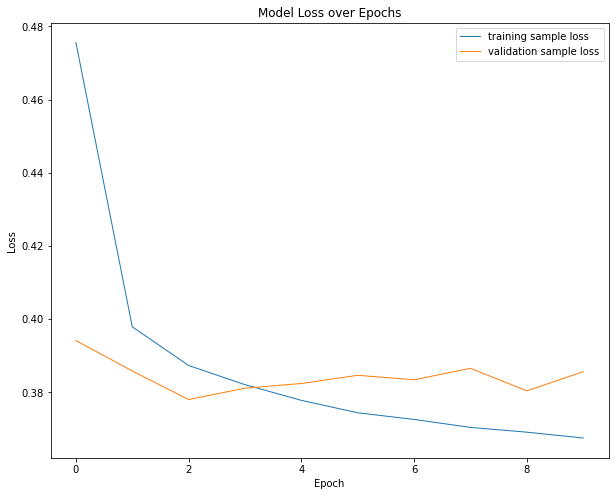

In [129]:
learningCurve(history)

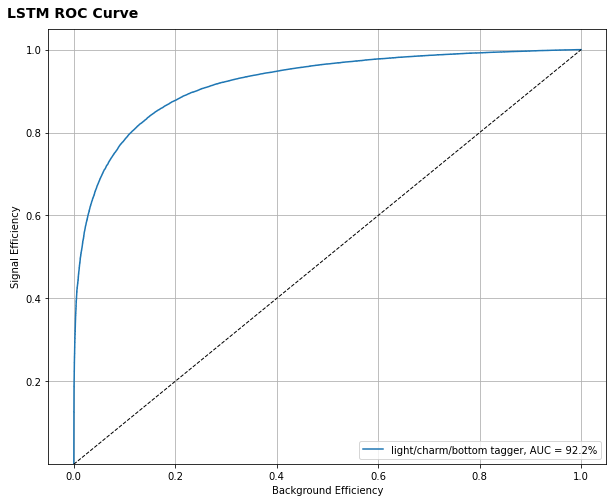

In [130]:
y_pred = makeRoc(X_test, y_test, labels, model, outputSuffix='two-layer')

In [131]:
model.save('LSTMDNNVERTEX2CLASS.h5')

In [141]:
Inputs = Input(shape=(15,7))
x = LSTM(16, kernel_initializer = 'VarianceScaling', kernel_regularizer = regularizers.l1_l2(l1= 9.999E-5, l2 = 0.0), name = 'lstm1')(Inputs)
x = Flatten(trainable= True)(x)
predictions = Dense(1, activation='sigmoid', kernel_initializer='lecun_uniform', name = 'output_sigmoid')(x)
model = Model(inputs=Inputs, outputs=predictions)
model.summary()


Model: "model_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_20 (InputLayer)        [(None, 15, 7)]           0         
_________________________________________________________________
lstm1 (LSTM)                 (None, 16)                1536      
_________________________________________________________________
flatten_8 (Flatten)          (None, 16)                0         
_________________________________________________________________
output_sigmoid (Dense)       (None, 1)                 17        
Total params: 1,553
Trainable params: 1,553
Non-trainable params: 0
_________________________________________________________________


In [142]:
adam = Adam(lr = 0.0001)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [143]:
history = model.fit(X_train, y_train, batch_size = 1024, epochs = 10, 
                    validation_split = 0.25, shuffle = True, callbacks = None,
                    use_multiprocessing=True, workers=4)

Epoch 1/10
269/269 [==============================] - 14s 50ms/step - loss: 0.4945 - accuracy: 0.7797 - val_loss: 0.3997 - val_accuracy: 0.8317
Epoch 2/10
269/269 [==============================] - 12s 46ms/step - loss: 0.3913 - accuracy: 0.8346 - val_loss: 0.3851 - val_accuracy: 0.8369
Epoch 3/10
269/269 [==============================] - 13s 48ms/step - loss: 0.3795 - accuracy: 0.8389 - val_loss: 0.3743 - val_accuracy: 0.8410
Epoch 4/10
269/269 [==============================] - 16s 61ms/step - loss: 0.3716 - accuracy: 0.8423 - val_loss: 0.3685 - val_accuracy: 0.8435
Epoch 5/10
269/269 [==============================] - 14s 54ms/step - loss: 0.3674 - accuracy: 0.8439 - val_loss: 0.3667 - val_accuracy: 0.8450
Epoch 6/10
269/269 [==============================] - 13s 48ms/step - loss: 0.3646 - accuracy: 0.8449 - val_loss: 0.3620 - val_accuracy: 0.8459
Epoch 7/10
269/269 [==============================] - 12s 46ms/step - loss: 0.3628 - accuracy: 0.8452 - val_loss: 0.3606 - val_accuracy:

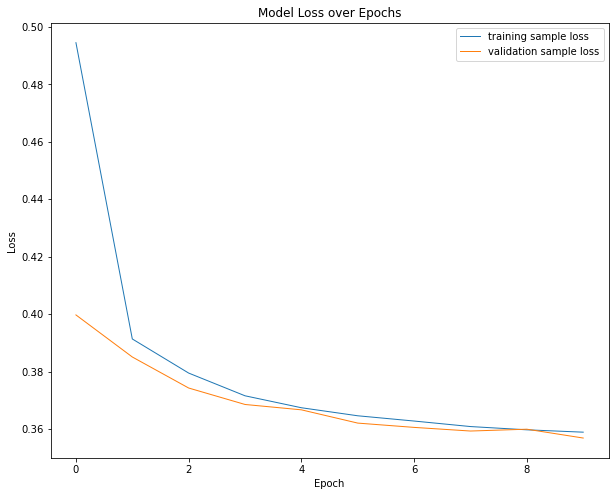

In [145]:
learningCurve(history)

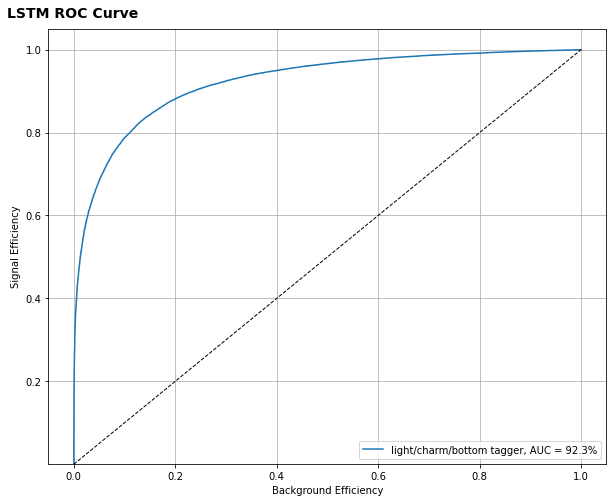

In [146]:
y_pred = makeRoc(X_test, y_test, labels, model, outputSuffix='two-layer')

In [ ]:
import external_RNN_code.py

In [18]:
def Pair_inputs(data, num_tracks_for_pairing = 15):
    """
        assuming data shape is: (batch, num_tracks, 13)
    
        returns:
        ---------
        (batch , num_tracks_for_pairing**2, 26)
    """

    # Example: input of shape (batch, 10 (const. #tracks), 13)
    # --> 100 pairs including (a,b), (b,a)
    # stacking the pairs' features together --> 2*13 features
    # will be re-permuted & duplicated into (batch, 100, 26)
    # [optional] transpose / reshape --> (batch * 100, 26)

    sp = data.shape
    
    num_feat = sp[2]
    assert data.ndim==3

    result = np.zeros((sp[0], num_tracks_for_pairing**2, num_feat*2),'float32')

    
    for i in range(num_tracks_for_pairing):
        result[:, i::num_tracks_for_pairing, :num_feat] = data
        result[:, i*num_tracks_for_pairing:num_tracks_for_pairing + i*num_tracks_for_pairing, num_feat:] = data

    return result






def build_External_RNN(special_layer_hidden_units=20, 
                                 num_tracks_for_pairing = 15, 
                                 hidden_layers = [300, 300], 
                                 dropout_rates = [0.2, 0.2],
                                 num_classes = 2, 
                                 num_input_features = 13, 
                                 weight_decay_rate = None):
    '''
     Example: original features have input shape (batch, 15 (const. #tracks), 13)
     --> 225 pairs including (a,b), (b,a), -- (we could remove those double-counts)
     stacking the pair's features together --> 2*13 features
     --> model expects input of shape: (batch, 225, 26)
         
     Apply FC-layer with <num_units> neurons (don't choose too many as everything will be big) along the time axis 
     [note that flatten_input=False takes care of this in my DNN code, but keras might need somthine like TimeDistributed()].
     
     Then put standard MLP on it
    '''

    input_mid = layers.Input(shape=(None, num_tracks_for_pairing**2, 2 * num_input_features))

    #(batch , 100, 26)
    L = layers.Layer_Dense(input_mid, special_layer_hidden_units, flatten_input=False, activation_function='ReLu')
    #(batch , 100, special_layer_hidden_units)

    for i, nh in enumerate(hidden_layers):
        L = layers.Layer_Dropout(L, dropout_rate=dropout_rates[i])
        L = layers.Layer_Dense(L, nh, flatten_input=True, activation_function='ReLu')

    last = layers.Layer_Dense(L, num_classes, activation_function='linear')

    lay = layers.Layer_Output(last)
    
    dnn = GNET.model()
    dnn.add(lay)
    dnn.InitializeModel(weight_decay_rate = weight_decay_rate)
    return dnn



In [ ]:
GNET.model

In [23]:
pair = Pair_inputs(features)

In [25]:
f = h5py.File('pair_inputs.h5', 'w')

In [26]:
f.create_dataset(data = features, name = 'features')

<HDF5 dataset "features": shape (458720, 15, 7), type "<f8">

In [30]:
f.close()

In [31]:
f = h5py.File('pair_inputs.h5', 'r')

In [33]:
f.close()

In [ ]:
pair

In [24]:
X_train, X_test, y_train, y_test = train_test_split(pair,lab,test_size = 0.2, random_state = 42)


In [ ]:
X_train.shape

In [27]:
adam = Adam(lr = 0.002)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [26]:
Inputs = Input(shape=(225,14))
x = TimeDistributed(Dense(10, activation='relu', kernel_initializer='lecun_uniform', name='fc1'))(Inputs)
x= Dropout(rate = 0.3)(x)
x=Flatten()(x)
x = Dense(6, activation='relu', kernel_initializer='lecun_uniform', name='fc7')(x)
x = Dropout(rate = 0.3)(x)
x = Dense(2, activation='relu', kernel_initializer='lecun_uniform', name='fc6')(x)

predictions = Dense(1, activation='sigmoid', kernel_initializer='lecun_uniform', name = 'output_sigmoid')(x)
model = Model(inputs=Inputs, outputs=predictions)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 225, 14)]         0         
_________________________________________________________________
time_distributed (TimeDistri (None, 225, 10)           150       
_________________________________________________________________
dropout (Dropout)            (None, 225, 10)           0         
_________________________________________________________________
flatten (Flatten)            (None, 2250)              0         
_________________________________________________________________
fc7 (Dense)                  (None, 6)                 13506     
_________________________________________________________________
dropout_1 (Dropout)          (None, 6)                 0         
_________________________________________________________________
fc6 (Dense)                  (None, 2)                 14    

In [28]:
history = model.fit(X_train, y_train, batch_size = 1024, epochs = 25, 
                    validation_split = 0.25, shuffle = True, callbacks = None,
                    use_multiprocessing=True, workers=4)

Epoch 1/25
269/269 [==============================] - 18s 67ms/step - loss: 0.4886 - accuracy: 0.7770 - val_loss: 0.3972 - val_accuracy: 0.8174
Epoch 2/25
269/269 [==============================] - 20s 74ms/step - loss: 0.4323 - accuracy: 0.8001 - val_loss: 0.3885 - val_accuracy: 0.8293
Epoch 3/25
269/269 [==============================] - 20s 73ms/step - loss: 0.4252 - accuracy: 0.8063 - val_loss: 0.3828 - val_accuracy: 0.8334
Epoch 4/25
269/269 [==============================] - 20s 75ms/step - loss: 0.4211 - accuracy: 0.8093 - val_loss: 0.3789 - val_accuracy: 0.8353
Epoch 5/25
269/269 [==============================] - 20s 74ms/step - loss: 0.4164 - accuracy: 0.8130 - val_loss: 0.3770 - val_accuracy: 0.8341
Epoch 6/25
269/269 [==============================] - 21s 80ms/step - loss: 0.4132 - accuracy: 0.8162 - val_loss: 0.3740 - val_accuracy: 0.8360
Epoch 7/25
269/269 [==============================] - 22s 84ms/step - loss: 0.4088 - accuracy: 0.8180 - val_loss: 0.3683 - val_accuracy:

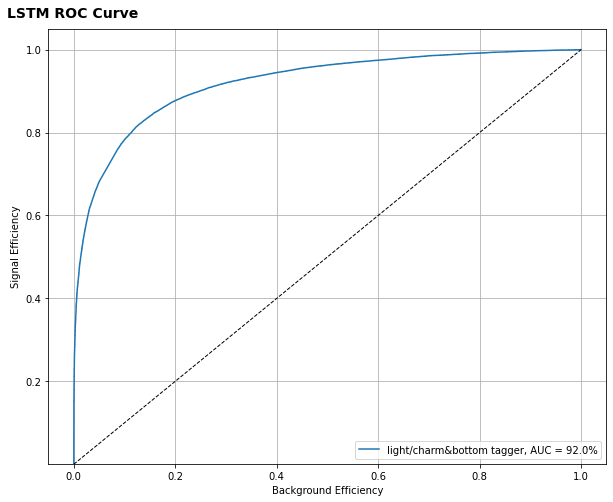

In [31]:
y_pred = makeRoc(X_test, y_test, labels, model, outputSuffix='two-layer')

In [31]:
labels = ['light/charm&bottom']


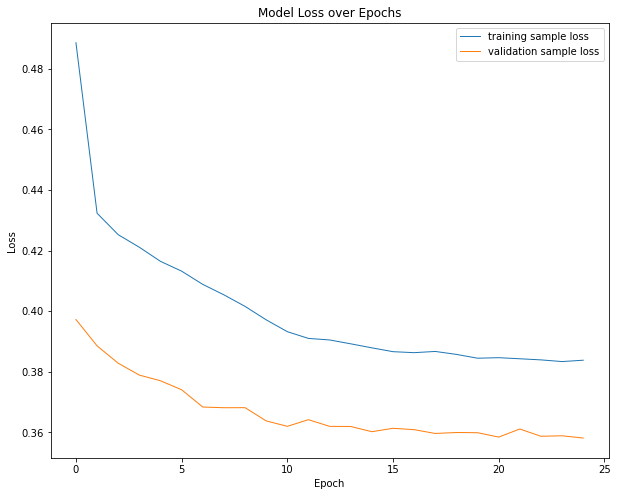

In [32]:
learningCurve(history)

In [50]:
model.save('EXTERNALRNN_VERTEX_SMALL_TIMEDISTRIBUTED.h5')

In [4]:
model = keras.models.load_model('EXTERNALRNNVERTEXSMALL.h5')

In [5]:
model.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 225, 14)]         0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 3150)              0         
_________________________________________________________________
fc7 (Dense)                  (None, 4)                 12604     
_________________________________________________________________
dropout_16 (Dropout)         (None, 4)                 0         
_________________________________________________________________
fc8 (Dense)                  (None, 2)                 10        
_________________________________________________________________
output_sigmoid (Dense)       (None, 3)                 9         
Total params: 12,623
Trainable params: 12,623
Non-trainable params: 0
_______________________________________________________